# Option pricing using the Black-Scholes-Merton Model
It calculates the theoretical value of an option based on 5 variables:
- Underlying Price(S)
- Strike Price(k)
- Time to Expiration(T)
- Risk Free Rate(r)
- Volatility(σ)

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
#initialitating the variables
S=42
k=40
T=0.5
r=0.1
vol=0.2

#
d1=(math.log(S/k)+(r+0.5*vol**2)*T)/(vol*math.sqrt(T))
#
d2=d1-vol*math.sqrt(T)

#Calculate Call Option Price, where:
#S * norm.cdf(d1) is the expected benefit from owning the underlying asset if the option is exercised.
#K * exp(-r * T) * norm.cdf(d2) is the present value of the strike price, weighted by the probability that the option will be exercised.
C=S*norm.cdf(d1)-k*math.exp(-r*T)*norm.cdf(d2)

#Calculate Put option Price, where:
#K*exp(-r*T)*norm.cdf(-d2) is the present value of receiving the strike price if the option is exercised.
#S*norm.cdf(-d1) is the expected cost of buying the underlying asset if the option is exercised.
P=k*math.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)

print('d1=',round(d1,2))
print('d2=',round(d2,2))
print('C=',round(C,2))
print('P=',round(P,2))

d1= 0.77
d2= 0.63
C= 4.76
P= 0.81


In [5]:
def black_scholes_merton(S,k,T,r,vol):

    d1=(math.log(S/k)+(r+0.5*vol**2)*T)/(vol*math.sqrt(T))
    d2=d1-vol*math.sqrt(T)

    #Calculate Call Option Price:
    C=S*norm.cdf(d1)-k*math.exp(-r*T)*norm.cdf(d2)

    #Calculate Put option Price:
    P=k*math.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    return C,P

black_scholes_merton(S=42,k=40,T=0.5,r=0.1,vol=0.2)

(4.759422392871532, 0.8085993729000922)

**Black-Scholes-Merton Model Summary for Option Pricing.** 

The Black-Scholes model is a mathematical formula used to estimate the theoretical price of European-style call and put options.

- C (Call Option Price): This is the calculated theoretical price of a call option. It represents the value of the right, but not the obligation, to buy the underlying asset at the strike price (K) on the expiration date (T). "C" is not a prediction of the future price of the underlying asset. It reflects the fair market value of the option contract itself, considering the probability of the option becoming profitable (in-the-money).

- P (Put Option Price): This is the calculated theoretical price of a put option. It represents the value of the right, but not the obligation, to sell the underlying asset at the strike price (K) on the expiration date (T).


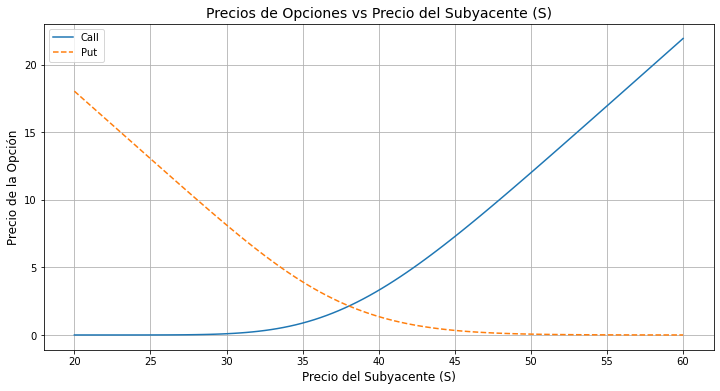

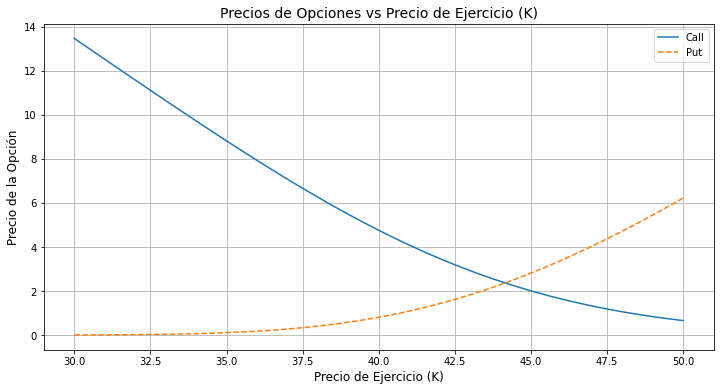

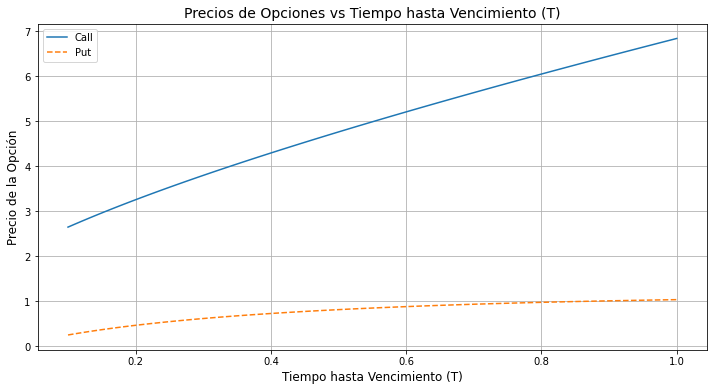

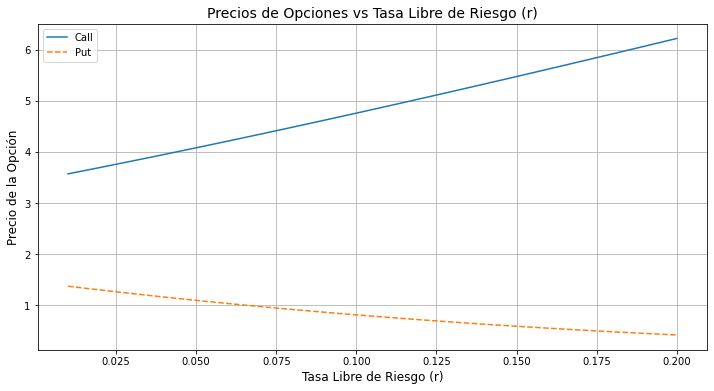

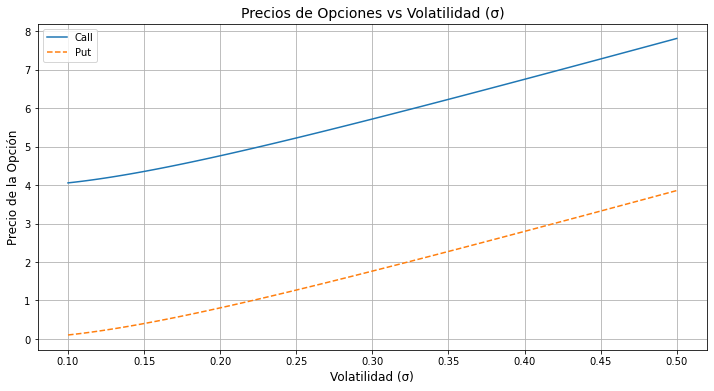

In [11]:
# Parámetros iniciales
S = 42  # Precio del subyacente
K = 40  # Precio de ejercicio
T = 0.5  # Tiempo hasta vencimiento
r = 0.1  # Tasa libre de riesgo
vol = 0.2  # Volatilidad

# Rango de valores para cada parámetro
S_values = np.linspace(20, 60, 100)
K_values = np.linspace(30, 50, 100)
T_values = np.linspace(0.1, 1, 100)
r_values = np.linspace(0.01, 0.2, 100)
vol_values = np.linspace(0.1, 0.5, 100)

# Función para graficar
def plot_option_prices(x_values, x_label, param_name, fixed_values):
    plt.figure(figsize=(12, 6))

    C_values = []
    P_values = []

    for x in x_values:
        # Actualizar el parámetro que varía
        params = fixed_values.copy()
        params[param_name] = x
        
        # Calcular precios de opciones
        C, P = black_scholes_merton(params['S'], params['K'], params['T'], params['r'], params['vol'])
        C_values.append(C)
        P_values.append(P)

    plt.plot(x_values, C_values, label="Call")
    plt.plot(x_values, P_values, linestyle='--', label="Put")

    plt.title(f"Precios de Opciones vs {x_label}", fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Precio de la Opción", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

# Valores fijos
fixed_values = {
    'S': S,
    'K': K,
    'T': T,
    'r': r,
    'vol': vol
}

# Graficar para cada parámetro
plot_option_prices(S_values, "Precio del Subyacente (S)", 'S', fixed_values)
plot_option_prices(K_values, "Precio de Ejercicio (K)", 'K', fixed_values)
plot_option_prices(T_values, "Tiempo hasta Vencimiento (T)", 'T', fixed_values)
plot_option_prices(r_values, "Tasa Libre de Riesgo (r)", 'r', fixed_values)
plot_option_prices(vol_values, "Volatilidad (σ)", 'vol', fixed_values)
